In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
 
import numba
@numba.jit(nopython=True)  # Set nopython=True to avoid the error
def my_function():
    # Your numba-optimized code here
    pass
 

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

 
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

import random
import csv
import openpyxl
 

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist 
 
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import pickle 


from shap import TreeExplainer, Explanation
from shap.plots import waterfall
import shap
print(shap.__version__)
print(tf.__version__)

import random
from tabulate import tabulate 

# Define custom metrics
recall = Recall()
precision = Precision()
auc = AUC()



0.39.0
2.16.1


In [4]:
dataSetIndex = 6
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))

finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ]  

# ------------------------------------------------------

df_majority = fileData[fileData.CoronaryHeartDisease==0]
df_minority = fileData[fileData.CoronaryHeartDisease==1]

print("Shape of df_majority: {}".format(df_majority.shape))
print("Shape of df_minority: {}".format(df_minority.shape))

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


fileData = df_upsampled

# ---------------------------------------------------

X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
X = X.drop('Gender', axis=1)  # Features
#cols = ['Gender', 'Age','Annual-Family-Income', 'Cholesterol', 'Diabetes', 'Triglycerides', 'Red-Cell-Distribution-Width', 'X60-sec-pulse', 'Height', 'Albumin', 'Blood-Rel-Stroke', 'Blood-Rel-Diabetes', 'HDL', 'Moderate-work','Iron', 'Hemoglobin','Protein', 'SEQN'   ] 
#cols = ['Age','Gender','Blood-Rel-Stroke','Triglycerides','Blood-Rel-Diabetes','Cholesterol','Platelet-count','Diabetes','Albumin','Hemoglobin','Moderate-work','Diastolic','Protein','Height','X60-sec-pulse','White-Blood-Cells','Bilirubin','Hematocrit','HDL','Systolic' ] 
#X = fileData[cols]

Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))

dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_SKLearn_reSample_14May24_2")
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += "_{}".format(fileData.shape)



Shape of fileData: (37079, 40)
Column Headings: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte',
       'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Segmented-Neutrophils', 'Hematocrit', 'Albumin',
       'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'Iron',
       'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke',
       'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079

Number of Missing Values: 0
Number of duplicate records removed: 0
Shape of fileData: (37079, 40)
Shape of fileData End: (37079, 40)
Shape of df_majority: (35571, 40)
Shape of df_minority: (1508, 40)


columns of x:: 38 

 and features of X: Index(['Age', 'X60-sec-pulse', 'Systol

Target Column Name: CoronaryHeartDisease


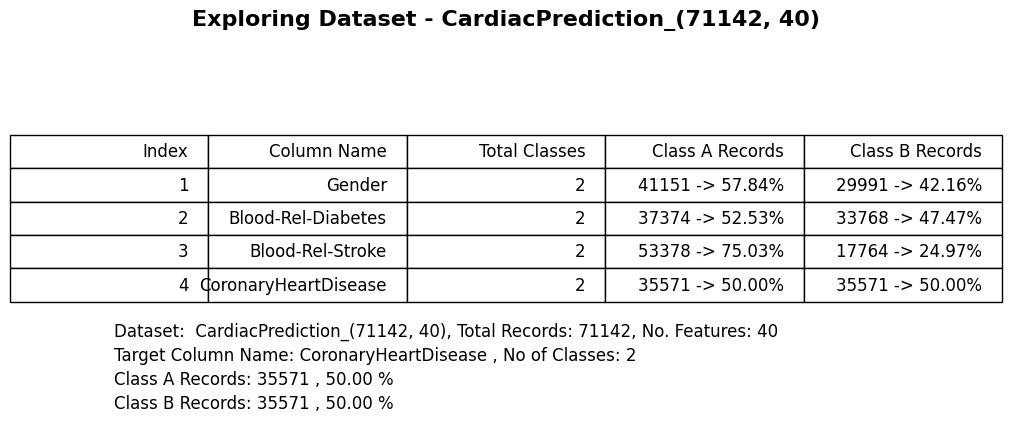

In [5]:
columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []
for column in columns:
    singleColumnCount = fileData[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 

tableDataRow = [
    ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'],
    
]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = fileData[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

# Create the figure and axes
fig, ax = mplot.subplots() 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 
print("Target Column Name: {}".format(columns[-1]))


dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, fileData.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(fileData[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[0], (np.array(fileData[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[1], (np.array(fileData[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.25,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.20,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, 0.15,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, 0.10,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   
 
 
mplot.axis('off')
mplot.title(f'Exploring Dataset - {dataSetName}' ,fontsize=16, fontweight='bold') 

picturePath = "{}1.DataSet_analysis_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig('DataSet_analysis.png', dpi=300)
mplot.show()
mplot.close()
 

In [6]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

# Split dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=27)

'''
# Display new class counts
print("Shape of fileData: {}".format(df_upsampled.shape))
print("Column Headings: {}".format(df_upsampled.__dataframe__().column_names()))
print("Number of Records: {}".format(df_upsampled.__dataframe__().num_rows()))
'''
 
print("X_train length: {}".format(len(X_train)))
print("y_train Length: {}".format(len(y_train)))
 
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 



print("\n X Train: Shape:: {}".format(X_train.shape))
print(" Y Train: Shape:: {}".format(y_train.shape))  
print(" X Test: Shape:: {}".format(X_test.shape))  
print(" Y Test: Shape:: {}".format(y_test.shape))   
 
 
positiveClass =  0
negativeClass = 0
for i in y_train:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Train DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Train DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Train DataSet Total Records:: {}".format(positiveClass + negativeClass)) 

print("\n\n") 


positiveClass =  0
negativeClass = 0
for i in y_test:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Test DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Test DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Test DataSet Total Records:: {}".format(positiveClass + negativeClass)) 



Shape of fileData: (71142, 40) , target Len:71142
X: (71142, 38) , Y:(71142,)
X_train length: 53356
y_train Length: 53356

 X Train: Shape:: (53356, 38)
 Y Train: Shape:: (53356,)
 X Test: Shape:: (17786, 38)
 Y Test: Shape:: (17786,)
Train DataSet Positive Class Records:: 26674
Train DataSet Negative Class Records:: 26682
Train DataSet Total Records:: 53356



Test DataSet Positive Class Records:: 8897
Test DataSet Negative Class Records:: 8889
Test DataSet Total Records:: 17786


In [7]:
def makeCorrelationPic(correlationMatrix, numberOfTopFeatures, targetColumnName):     
    correlation_values = correlationMatrix.abs()
    sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
    sorted_correlation = sorted_correlation[sorted_correlation != 1.0]

    num_features = numberOfTopFeatures  # Number of top features to display
    top_features = sorted_correlation.head(num_features)
    print("Top", num_features, "features based on correlation:")
    print(top_features)
 
    top_features = correlationMatrix.abs().nlargest(numberOfTopFeatures, targetColumnName)[targetColumnName].index
    top_correlation_matrix = correlationMatrix.loc[top_features, top_features]

    mplot.figure(figsize=(10, 8))
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
    # Set the title of the plot
    mplot.title('Correlation Heatmap ({})'.format(dataSetName))
    
    picturePath = "Correlation_Matrix_DateSetName_{}.png".format(dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    mplot.show()
    mplot.close()

def makeConfusionMatrixPic(method, dataSet, classifierObj , X_test, y_test, predicted_Y):
    display = ConfusionMatrixDisplay.from_estimator(classifierObj, X_test, y_test, display_labels=['Healthy', "Heart Disease"], cmap=mplot.cm.Blues) #, normalize="true"
    display.ax_.set_title("Confusion Matrix ({} Model)".format(method))
    ax_.set_xlabel('\nPredicted Values')
    ax_.set_ylabel('Actual Values ')


    accuracyString ="Accuracy {}: {:.2f}".format(method, accuracy_score(y_test, predicted_Y)*100.0 ) 
    recallString =  'Recall {}: {:.2f}'.format(method, recall_score(y_test, predicted_Y) * 100.0)
    precisionString = 'Precision {}: {:.2f}'.format(method, precision_score(y_test, predicted_Y) * 100.0) 
    dataSetString = "Dataset: {}".format(dataSet)

    
    if(classifierObj.n_features_in_ > 10):
        featureListString = 'Total Features: {}'.format(classifierObj.n_features_in_) 
    else:
        featureListString = 'Features: {}'.format(classifierObj.feature_names_in_) 
    
    display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
    display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
    display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.17,  dataSetString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.28,  featureListString, horizontalalignment='left', wrap=False ) 
 
    picturePath = "{}Confusion_Matrix_{}_{}.png".format(dataSetResultDirectory, method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))
    #os.startfile(picturePath)
    mplot.show()
    mplot.close()


In [8]:
X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test) 
# Our vectorized labels

X_train_f32 = np.asarray(X_train).astype(np.float32)  #.astype('float32').reshape((-1,1))
X_test_f32 = np.asarray(X_test).astype(np.float32)

'''
#y_train_scaler = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_scaler = np.asarray(y_test).astype('float32').reshape((-1,1))
y_train = np.asarray(y_train).astype(np.float64)  #.astype('float32').reshape((-1,1))
'''
  

# Separate features and target variable
features = X_train_scaler # data.iloc[:, :-1]
target = np.asarray(y_train).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
  
 
 

print("X_train shape: {}   and dType: {}".format(X_train.shape, len(X_train.columns)))
print("X_train_scaler shape: {}   and dType: {}".format(X_train_scaler.shape, X_train_scaler.dtype))
print("X_test_scaler shape: {}   and dType: {}".format(X_test_scaler.shape, X_test_scaler.dtype)) 


print("y_train shape: {}   and dType: {}".format(y_train.shape, y_train.dtype))  
#print("y_test_scaler shape: {}   and dType: {}".format(y_test_scaler.shape, y_test_scaler.dtype))  

 
print("features shape: {}   and dType: {}".format(features.shape, features.dtype)) 
print("target shape: {}   and dType: {}".format(target.shape, target.dtype)) 

X_train shape: (53356, 38)   and dType: 38
X_train_scaler shape: (53356, 38)   and dType: float64
X_test_scaler shape: (17786, 38)   and dType: float64
y_train shape: (53356,)   and dType: int64
features shape: (53356, 38)   and dType: float64
target shape: (53356, 1)   and dType: float64


In [9]:
tf.keras.backend.clear_session()   
totalFeatures= features.shape[1] 
print("Total Feature for number of node in Layer: {}".format(totalFeatures)) 
input_layer = Input(shape=(totalFeatures,))
# Traditional neural network part
x = layers.Dense(totalFeatures*2, activation='relu')(input_layer)
#x = layers.Dense(totalFeatures*3, activation='relu')(x) 
#x = layers.Dense(totalFeatures*2, activation='relu')(x) 
x = layers.Dense(totalFeatures, activation='relu')(x) 
x = layers.Dense(totalFeatures//2, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer) 
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics
'''
if tf.config.list_physical_devices('GPU'):
    print("GPU detected, using GPU for training.")
    with tf.device("/GPU:0"):
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', recall, precision, auc])
else:
    print("GPU not detected, using CPU for training.")
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics
'''
  
# Display the model summary
#model.summary()
 



Total Feature for number of node in Layer: 38


'\nif tf.config.list_physical_devices(\'GPU\'):\n    print("GPU detected, using GPU for training.")\n    with tf.device("/GPU:0"):\n        model.compile(loss=\'binary_crossentropy\', optimizer=optimizer, metrics=[\'accuracy\', recall, precision, auc])\nelse:\n    print("GPU not detected, using CPU for training.")\n    model.compile(loss=\'binary_crossentropy\', optimizer=optimizer, metrics=[\'accuracy\', Recall(), Precision(), AUC()])  # Add custom metrics\n'

In [10]:
numberOfEpochs = 5
batchSizeOfTraining = 25
history = 0
history = model.fit(X_train_scaler, target, epochs=numberOfEpochs, batch_size=batchSizeOfTraining) #
#history = model.fit(features, target, epochs=numberOfEpochs, batch_size=batchSizeOfTraining) 

model2 = model


Epoch 1/5
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7835 - auc: 0.8594 - loss: 0.4596 - precision: 0.7579 - recall: 0.8403
Epoch 2/5
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - auc: 0.9215 - loss: 0.3313 - precision: 0.8245 - recall: 0.9239
Epoch 3/5
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9070 - auc: 0.9497 - loss: 0.2471 - precision: 0.8627 - recall: 0.9677
Epoch 4/5
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9316 - auc: 0.9653 - loss: 0.1945 - precision: 0.8919 - recall: 0.9827
Epoch 5/5
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9405 - auc: 0.9734 - loss: 0.1705 - precision: 0.9045 - recall: 0.9844


In [11]:
# Plotting training accuracy
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
picturePath = "{}3.Model_training_Accuracy_{}_epoches_{}.png".format(dataSetResultDirectory, dataSetName, numberOfEpochs)
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [12]:
# Evaluate the model using the evaluate method
y_test_float64 = np.asarray(y_test).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']

loss, accuracy, recall_value, precision_value,  auc_value = model2.evaluate(X_test_scaler, y_test_float64)

# Print the results
print('Test loss: {}'.format(loss*100))
print('Test accuracy: {}'.format(accuracy*100))
print('Test recall: {}'.format(recall_value*100))
print('Test precision: {}'.format(precision_value*100))
print('Test AUC: {}'.format(auc_value*100))


picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, "Testing_Accuracy", dataSetName, numberOfEpochs)


556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9260 - auc: 0.9616 - loss: 0.2113 - precision: 0.8879 - recall: 0.9729
Test loss: 21.019843220710754
Test accuracy: 92.75835156440735
Test recall: 97.16758728027344
Test precision: 89.29862380027771
Test AUC: 96.187424659729


In [13]:
for layer in model2.layers:
    weights = layer.get_weights()
    if weights:
        print(layer.name, [w.dtype for w in weights])

dense [dtype('float32'), dtype('float32')]
dense_1 [dtype('float32'), dtype('float32')]
dense_2 [dtype('float32'), dtype('float32')]
dense_3 [dtype('float32'), dtype('float32')]


In [14]:
percentage = 0.03
numberOfFeatures = int(len(features) *percentage)
print("Total Features: {} -> Selected for SHAP:: {}".format(len(features), numberOfFeatures))
featuresForShap = X_train.columns #features[0:numberOfFeatures]
#print(" Features Name: {}".format(  featuresForShap))

numberOftest = int(len(X_test_scaler) * percentage)
print("Total Test: {} -> Selected for SHAP:: {}".format(len(X_test_scaler), numberOftest))
xTrainForShap = (X_train_scaler[0:int(len(X_train_scaler)/3.0)]).astype(np.float32)

testForShap = (X_test_scaler[0:numberOftest]).astype(np.float32)

print("xTrainForShap:: {}".format(len(xTrainForShap)))
print("testForShap:: {}".format(len(testForShap)))
#print(" testForShap Name: {}".format(  testForShap))

Total Features: 53356 -> Selected for SHAP:: 1600
Total Test: 17786 -> Selected for SHAP:: 533
xTrainForShap:: 17785
testForShap:: 533


In [18]:
# Create SHAP explainer
explainer = shap.KernelExplainer(model, pd.DataFrame(xTrainForShap, columns=featuresForShap))

# Compute SHAP values
#shap_values = explainer.shap_values(pd.DataFrame(testForShap, columns=featuresForShap))

shap_values = explainer.shap_values(testForShap)

Using 17785 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/533 [00:00<?, ?it/s]

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
threshold = 0.5  # Adjust the threshold as needed
binary_predictions = (model2.predict(X_test_scaler) > threshold).astype(int)

cm = confusion_matrix(y_test_float64, binary_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Heart Disease'])
display.plot(cmap=plt.cm.Blues, values_format=".4g" ) 


method = "MLP with Attention layer"
display.ax_.set_title("Results {} Model".format(method),fontsize=16, fontweight='bold')
display.ax_.set_xlabel('\nPredicted Values')
display.ax_.set_ylabel('Actual Values ')

accuracyString ="Accuracy {}: {:.2f}%".format(method, accuracy*100.0 ) 
recallString =  'Recall {}: {:.2f}%'.format(method, recall_value* 100.0)
precisionString = 'Precision {}: {:.2f}%'.format(method, precision_value * 100.0)  
featureListString = "AUC Score: {:.2f}%".format(auc_value * 100.0)
totaldataSetString = "Total Dataset records: {}".format((len(features)+len(X_test_scaler)))
testingdataSetString = "Testing records: {} , {:.1f}%".format(len(X_test_scaler), ( ( len(X_test_scaler) / (len(features)+len(X_test_scaler)) )*100.0  ))
numberOfEpochsString = "Number of Epoches: {}".format(numberOfEpochs)
batchSizeOfTrainingString = "BatchSize for Epoch: {}".format(batchSizeOfTraining)

display.figure_.text(0.010, -0.08,  accuracyString, horizontalalignment='left', wrap=False )  
display.figure_.text(0.010, -0.12,  recallString, horizontalalignment='left', wrap=False )      
display.figure_.text(0.010, -0.16,  precisionString, horizontalalignment='left', wrap=False )  
display.figure_.text(0.010, -0.20,  featureListString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.25,  totaldataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.29,  testingdataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.33,  numberOfEpochsString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.37,  batchSizeOfTrainingString, horizontalalignment='left', wrap=False ) 
 
picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))

mplot.show()
mplot.close()


In [ ]:
csvPath = "{}Model_training_accuracy_and_evaluations_{}_{}_Epoch_{}.xlsx".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)

# Create a new workbook
wb = openpyxl.Workbook()
ws = wb.active  # Get the active worksheet

str22 = (classification_report(y_test, binary_predictions))
 
str22.strip() 
str22.replace(" ", ",")
print(str22)
print("-------------=-=-=-=----------------")
data_lines = str22.splitlines()  # Split by newlines
str22 = str("\n\n\n Training accuracy:\n"  )
data_lines += str22.splitlines()  # Split by newlines
str22 = str(history.history['accuracy'])
str22.strip() 
str22.replace(" ", ",")
str22.replace("[", "")
str22.replace("]", "")
print(str22)
print("-------------=-=-=-=----------------")
data_lines += str22.splitlines()  # Split by newlines

print(data_lines)
# Split each line into a list (comma-separated values)
xlsFileData = [line.split(",") for line in data_lines]
# Write the data to the worksheet, starting from row 1
for row_index, row in enumerate(xlsFileData):
    for col_index, value in enumerate(row):
        ws.cell(row=row_index + 1, column=col_index + 1).value = value

# Save the workbook
wb.save(csvPath)

 

In [ ]:
# Calculate AUC
auc_score = roc_auc_score(y_test, binary_predictions)
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, binary_predictions)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

picturePath = "{}Model_Evaluation_ROC_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()




In [ ]:
# Plot Testing accuracy
plt.figure(figsize=(10, 6))

for metric_name in history.history.keys():
    plt.plot(history.history[metric_name], label=metric_name.capitalize())

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Model Training Metrics')
# Add legend
plt.legend()

picturePath = "{}Model_Training_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()


In [ ]:
for layer in model2.layers:
    weights = layer.get_weights()
    if weights:
        print(layer.name, [w.dtype for w in weights])

In [ ]:
23423werwer234



In [ ]:
percentage = 0.03
numberOfFeatures = int(len(features) *percentage)
print("Total Features: {} -> Selected for SHAP:: {}".format(len(features), numberOfFeatures))
featuresForShap = X_train.columns #features[0:numberOfFeatures]
#print(" Features Name: {}".format(  featuresForShap))

numberOftest = int(len(X_test_scaler) * percentage)
print("Total Test: {} -> Selected for SHAP:: {}".format(len(X_test_scaler), numberOftest))
xTrainForShap = (X_train_scaler[0:int(len(X_train_scaler)/3.0)]).astype(np.float32)

testForShap = (X_test_scaler[0:numberOftest]).astype(np.float32)

print("xTrainForShap:: {}".format(len(xTrainForShap)))
print("testForShap:: {}".format(len(testForShap)))
#print(" testForShap Name: {}".format(  testForShap))

In [ ]:
# Create SHAP explainer
explainer = shap.KernelExplainer(model=model2, data=pd.DataFrame(xTrainForShap, columns=featuresForShap))

# Compute SHAP values
shap_values = explainer.shap_values(pd.DataFrame(testForShap, columns=featuresForShap), nsamples=200)


In [ ]:
print("model2  DType:: {}".format( model2.dtype))

X_train_scaler_f32 = np.asarray(X_train_scaler).astype(np.float32)  #.astype('float32').reshape((-1,1))
testForShap_f32 = np.asarray(testForShap).astype(np.float32)

print("---------------")
print("X_train_scaler_f32 Shape:: {} -> DType:: {}".format(X_train_scaler_f32.shape, X_train_scaler_f32.dtype))
print("testForShap_f32 Shape:: {} -> DType:: {}".format(testForShap_f32.shape, testForShap_f32.dtype))
print("---------------")


explainer = shap.KernelExplainer(model=model2, data=X_train_scaler_f32)


In [ ]:
shap_values = explainer.shap_values(testForShap_f32, nsamples=200)


In [ ]:
# Feature ranking (average absolute SHAP values)
feature_names = list(X_test.columns)  # Assuming column names are features
average_shap_values = np.abs(shap_values).mean(axis=0)
feature_ranking = sorted(zip(feature_names, average_shap_values), key=lambda x: x[1], reverse=True)

# Print feature ranking
print("Feature Ranking:")
for feature, importance in feature_ranking:
  print(f"{feature}: {importance:.4f}")

In [ ]:
shap.summary_plot(shap_values, testForShap)
# Plot waterfall plot for a specific instance (change index as needed)
shap.waterfall_plot(shap_values[0])
# Plot bubble plot
shap.summary_plot(shap_values, testForShap, plot_type='dot')
# Plot KDE plot for a specific feature (change feature index as needed)
shap.dependence_plot('Age', shap_values, testForShap, interaction_index=None, show=False)

# Show all plots
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already trained your MLP model and have X_test data

# Create a SHAP explainer for your trained model
explainer = shap.Explainer(model2, xTrainForShap)

# Compute SHAP values
shap_values = explainer.shap_values(pd.DataFrame(testForShap, columns=featuresForShap), nsamples=200)
# Compute SHAP values for your test data
shap_values = explainer.shap_values(testForShap)
# Plot summary plot
shap.summary_plot(shap_values, testForShap)
# Plot waterfall plot for a specific instance (change index as needed)
shap.waterfall_plot(shap_values[0])
# Plot bubble plot
shap.summary_plot(shap_values, testForShap, plot_type='dot')
# Plot KDE plot for a specific feature (change feature index as needed)
shap.dependence_plot('Age', shap_values, testForShap, interaction_index=None, show=False)

# Show all plots
plt.show()


# shap.DeepExplainer

In [ ]:
#deepExplainer = shap.DeepExplainer(model, features[0:int(numberOftest*5)])
deepExplainer = shap.DeepExplainer(model,  xTrainForShap)

# Compute SHAP values
deepShap_values = deepExplainer.shap_values(testForShap)
#deepShap_values = deepExplainer.shap_values(testForShap)



In [ ]:
deepShap_array = np.array(deepShap_values) 
mean_abs_shap_values = np.mean(np.abs(deepShap_array), axis=(0, 1)) 
sorted_indices = np.argsort(mean_abs_shap_values)[::-1] 
sorted_feature_names = np.array(X.columns.to_list())[sorted_indices]

sorted_shap_values = deepShap_array[:, sorted_indices].T
#print(sorted_shap_values) 
deepShapValuesPlot = mean_abs_shap_values[sorted_indices]

str22 = 0
csvPath = "{}Model_SHAP_DeepExplainer_FeatureRanking_{}_{}_Epoch_{}.xlsx".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
str22 = str("DeepExplainer Top Feature List\n")
indexx = 1
for feature, mean_shap_value in zip(sorted_feature_names, mean_abs_shap_values[sorted_indices]):
        str22 += str(f"{indexx}, {feature}, {mean_shap_value} \n") 
        indexx += 1

# Create a new workbook
wb = openpyxl.Workbook()
ws = wb.active  # Get the active worksheet
data_lines = str22.splitlines()  # Split by newlines
 
# Split each line into a list (comma-separated values)
xlsFileData = [line.split(",") for line in data_lines] 
for row_index, row in enumerate(xlsFileData):
    for col_index, value in enumerate(row):
        ws.cell(row=row_index + 1, column=col_index + 1).value = value

# Save the workbook
wb.save(csvPath)

print("DeepExplainer Top Feature List")
print("--------------------------------")
for feature, mean_shap_value in zip(sorted_feature_names, mean_abs_shap_values[sorted_indices]):
    print(f"{feature}, {mean_shap_value}") 



In [ ]:
shap.summary_plot(deepShap_values, deepTestValues, feature_names=featuresForShap, show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP DeepExplainer" ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_DeepExplainer_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.show()
#os.startfile(picturePath)
mplot.close()


In [ ]:
explanation = shap.Explanation(deepTestValues[0], deepExplainer.expected_value, deepTestValues[0])

shap.waterfall_plot(explanation)


# Select the first instance from the test set for explanation
instance_to_explain = X_test_scaler[0]  # Index 0 refers to the first instance

shap.initjs()
#shap.waterfall_plot(deepShap_values, instance_to_explain[np.newaxis, ...], feature_names=featuresForShap)
shap.waterfall_plot(shap.Explanation(values=deepTestValues[0], base_values=deepExplainer.expected_value, data=deepTestValues[0]))


In [ ]:
# Extract SHAP values for the first instance
shap_values_first_instance = deepShap_values[0][0] 
shap_values_first_instance_array = np.array(shap_values_first_instance)

# Plot waterfall plot for the first instance
# Plot waterfall plot for the first instance
shap.initjs()
shap.waterfall_plot(shap.Explanation(values=shap_values_first_instance_array,
                                      base_values=deepExplainer.expected_value,
                                      data=deepTestValues[0],
                                      feature_names=featuresForShap),
                    max_display=10)  # Adjust max_display as needed

shap.waterfall_plot(shap.Explanation(values=shap_values_first_instance,
                                      base_values=deepExplainer.expected_value[0],
                                      data=deepTestValues[0],
                                      feature_names=featuresForShap),
                    max_display=10)  # Adjust max_display as needed
plt.show()

In [ ]:
row = 8

print(f"Shape of DeepShapValues:{len(deepShap_values[0][row])}")
print(f"Shape of DeepShapValues:{len(deepShap_values[0])}")
print(f"Shape of expected_value:{len(deepExplainer.expected_value)}")
print(f"Shape of deepTestValues:{len(deepTestValues[row])}")
print(f"Shape of FeatureForSHAP:{featuresForShap.shape}")
shap.plots.waterfall(deepShap_values[0][row], deepExplainer.expected_value)
shap.waterfall_plot(deepShap_values[0][row])
shap.waterfall_plot(shap.Explanation(values=deepShap_values[0][row], base_values=deepExplainer.expected_value, data=deepTestValues[row], feature_names=featuresForShap))

In [ ]:
sample_to_explain = testForShap[1]  # Choose the first sample in the test set for illustration
print(f"Shape of DeepShapValues:{len(deepShap_values[0])}")
print(f"Shape of FeatureForSHAP:{featuresForShap.shape}")
print(len(sample_to_explain))
#print(sample_to_explain)

exp = Explanation(sample_to_explain, data=deepShap_values, feature_names=featuresForShap)  
print(exp.shape)

shap.plots.waterfall(exp)


In [ ]:
shap.plots.waterfall(Explanation() deepShap_values, max_display=10, show=True)


In [ ]:
howManyFeatures = 10
# Calculate feature importance based on the mean absolute SHAP values
feature_importance =  np.abs(deepShap_values).mean(axis=(0, 1))
top_features_indices = np.argsort(feature_importance)[::-1][:howManyFeatures]
# Select only the top features and corresponding SHAP values
print(top_features_indices)
featureNamesSHAP = X.columns[top_features_indices]
top_features = testForShap[:, top_features_indices]
top_shap_values = deepShap_values[0][:, top_features_indices]

print("\n--------------------------------------------------") 
print("Top SHAP Explainer values:")
for i in range(len(top_features_indices)):
    feature_index = top_features_indices[i]
    feature_name = X.columns[feature_index]
    shap_value = np.mean(np.abs(top_shap_values[:, i])) 
    print(f"{feature_name}, {shap_value}")
 
print("--------------------------------------------------\n") 
 

# Plot the summary plot for the top 15 features
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP DeeppExplainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_DeepExplainer2_Bar_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
#os.startfile(picturePath)
mplot.close()

In [ ]:
feature_names = X.columns.tolist() 
 
top_10_feature_names = [feature_names[i] for i in top_features_indices]
top_10_shap_values = deepShap_values[0][:, top_features_indices] 
# Create a DataFrame for visualization
df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)
# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('SHAP (DeepExplainer) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_Violinplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight') 
#plt.show()
plt.close()


# Plotting a Bubble Chart
plt.figure(figsize=(12, 6))

for i, feature in enumerate(top_10_feature_names):
    size = np.abs(df_top_10[feature]) * 100  # Adjust the scale as needed
    plt.scatter(x=[i] * len(df_top_10), y=df_top_10[feature], s=size, label=feature, alpha=0.6)
 
plt.title('SHAP (DeepExplainer) Bubble Chart')
plt.xlabel('Feature Index')
plt.ylabel('SHAP Values')
plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')
#plt.legend()
picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_BubbleChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

# Bubble Chart   
top_10_avg_shap_values = feature_importance[top_features_indices]

# Calculate the scale for bubble size based on the average values compared to others
size_scale = np.abs(top_10_avg_shap_values) / np.max(np.abs(top_10_avg_shap_values))
# Create a DataFrame for visualization
df_top_10_avg_shap = pd.DataFrame({'Feature': top_10_feature_names, 'Average SHAP Value': top_10_avg_shap_values})
# Plotting a Bubble Chart for top 10 average SHAP values
plt.figure(figsize=(12, 6))
size = size_scale * 1000  # Adjust the scale as needed
plt.scatter(x=range(len(df_top_10_avg_shap)), y=df_top_10_avg_shap['Average SHAP Value'], s=size, alpha=0.6)

plt.title('SHAP (DeepExplainer) Bubble Chart Average')
plt.xlabel('Feature Index')
plt.ylabel('Average SHAP Values')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')
picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_BubbleChartAverage_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()


# Plotting a boxplot for the top 10 features
plt.figure(figsize=(12, 6))
x_axis_range = (-0.10, 0.10)  # Adjust the range as needed
sns.boxplot(data=df_top_10, orient='v', palette='Set2')
plt.title('SHAP (DeepExplainer) Box Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Features')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')
picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_BoxPlot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()



In [ ]:
12 #  swarmplot (Beeswarm plot)
plt.figure(figsize=(15, 12))
sns.swarmplot(data=df_top_10, palette="muted", size=3) 
plt.title('SHAP (DeepExplainer) Beeswarm Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_DeepExplainer2_SNS_Beeswarmplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# shap.Explainer

In [ ]:
shap_explainer = shap.Explainer(model, feature_names=featuresForShap, masker=shap.maskers.Independent(data=testForShap)) 

shap_values = shap_explainer.shap_values(testForShap)  

In [ ]:
# Calculate feature importance based on the mean absolute SHAP values
feature_names = X.columns.tolist()
# Calculate average SHAP values across all instances
avg_shap_values = np.mean(shap_values, axis=0) 
 
# Calculate feature importance based on the mean absolute SHAP values
feature_importance =  np.abs(shap_values).mean(axis=0)
top_features_indices = np.argsort(feature_importance)[::-1][:howManyFeatures]
# Select only the top features and corresponding SHAP values
print(top_features_indices)
featureNamesSHAP = X.columns[top_features_indices]
top_features = testForShap[:, top_features_indices]
top_shap_values = shap_values[:, top_features_indices]

print("\n\n--------------------------------------------------") 
print("Top SHAP Explainer values:")
for i in range(len(top_features_indices)):
    feature_index = top_features_indices[i]
    feature_name = feature_names[feature_index]
    shap_value = np.mean(np.abs(top_shap_values[:, i])) 
    print(f"{feature_name}, {shap_value}")
 
 

# Plot the summary plot for the top 15 features
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, plot_type="bar", show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_Explainer_Bar_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.show()
#os.startfile(picturePath)
mplot.close()




In [ ]:
# Plot the summary plot for the top 15 features
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap))
shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_Explainer_Bar_{}_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.show()
#os.startfile(picturePath)
mplot.close()

In [ ]:
feature_names = X.columns.tolist() 
 

top_10_feature_names = [feature_names[i] for i in top_features_indices]
top_10_shap_values = shap_values[:, top_features_indices] 
# Create a DataFrame for visualization
df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)
# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('MLP Model with SHAP (XAI) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Violinplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight') 
#plt.show()
plt.close()

In [ ]:
# Plotting a Bubble Chart
plt.figure(figsize=(12, 6))

for i, feature in enumerate(top_10_feature_names):
    size = np.abs(df_top_10[feature]) * 100  # Adjust the scale as needed
    plt.scatter(x=[i] * len(df_top_10), y=df_top_10[feature], s=size, label=feature, alpha=0.6)
 
plt.title('MLP Model with SHAP (XAI) Bubble Chart')
plt.xlabel('Feature Index')
plt.ylabel('SHAP Values')
plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')
#plt.legend()

picturePath = "{}XAI_SHAP_Explainer_SNS_BubbleChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [ ]:
# Bubble Chart 
top_10_feature_names = [feature_names[i] for i in top_features_indices]
top_10_avg_shap_values = avg_shap_values[top_features_indices]

# Calculate the scale for bubble size based on the average values compared to others
size_scale = np.abs(top_10_avg_shap_values) / np.max(np.abs(top_10_avg_shap_values))
# Create a DataFrame for visualization
df_top_10_avg_shap = pd.DataFrame({'Feature': top_10_feature_names, 'Average SHAP Value': top_10_avg_shap_values})
# Plotting a Bubble Chart for top 10 average SHAP values
plt.figure(figsize=(12, 6))
size = size_scale * 1000  # Adjust the scale as needed
plt.scatter(x=range(len(df_top_10_avg_shap)), y=df_top_10_avg_shap['Average SHAP Value'], s=size, alpha=0.6)

plt.title('MLP Model with SHAP (XAI) Bubble Chart Average')
plt.xlabel('Feature Index')
plt.ylabel('Average SHAP Values')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_BubbleChartAverage_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [ ]:
# Plotting a boxplot for the top 10 features
plt.figure(figsize=(12, 6))

x_axis_range = (-0.10, 0.10)  # Adjust the range as needed
sns.boxplot(data=df_top_10, orient='v', palette='Set2')
plt.title('MLP Model with SHAP (XAI) Box Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Features')
plt.xticks(range(len(df_top_10_avg_shap)), df_top_10_avg_shap['Feature'], rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_BoxPlot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [ ]:
# Plotting an area chart for all SHAP values of the top 10 features
plt.figure(figsize=(15, 10))
for feature in top_10_feature_names:
    sns.lineplot(x=range(df_top_10.shape[0]), y=df_top_10[feature], label=feature)
 
plt.title('MLP Model with SHAP (XAI) Area Chart')

plt.xlabel('Instances')
plt.ylabel('SHAP Values')
plt.legend(loc='upper right')

picturePath = "{}XAI_SHAP_Explainer_SNS_AreaChart_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
#plt.show()
plt.close()

In [ ]:
import pickle
import datetime
currentDateTime = datetime.datetime.now() 
currentDateTime = currentDateTime.strftime("%Y%m%d_%H%M") 
modelPath = "{}model_trained_{}_{}_{}percent.model".format(dataSetResultDirectory, dataSetName, currentDateTime, accuracy)
print(modelPath)
model2.save(modelPath)


explainerPath = "{}ShapeExplainer_{}_{:.2f}percent.pkl".format(dataSetResultDirectory, currentDateTime, (accuracy*100))
print(explainerPath)

explainerValuePath = "{}ShapeExplainerValues_{}_{:.2f}percent.pkl".format(dataSetResultDirectory, currentDateTime, (accuracy*100))
print(explainerValuePath)
  
# Save the SHAP values to a file using pickle
with open(explainerValuePath, 'wb') as shap_values_file:
    pickle.dump(shap_values, shap_values_file)


# Save the SHAP values to a file using pickle
with open(explainerPath, 'wb') as explainer_file:
    pickle.dump(shap_explainer, explainer_file)

 

In [ ]:
'''
#  swarmplot (Beeswarm plot)
plt.figure(figsize=(15, 12))
sns.swarmplot(data=df_top_10, palette="muted", size=3) 
plt.title('MLP Model with SHAP (XAI) Beeswarm Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Beeswarmplot_{}_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, method, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()
'''

In [ ]:
# 2. Create a LIME explainer
lime_tabularExplainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=features,  # Your training features
    feature_names=list(X.columns),  # Your feature names
    class_names=['Healthy', 'Heart Patient'],  # Your class names (adjust for multiclass)
    mode='regression' if model.output_shape[1] > 1 else 'classification'  # Adjust for model type
)


In [ ]:
# 3. Choose a data point to explain
data_point_index = 10  # Replace with the index of the point you want to explain
data_point = features[data_point_index]
instance_to_explain_2d = data_point.reshape(1, -1)
 
explanation = lime_tabularExplainer.explain_instance(instance_to_explain_2d[0],  model.predict)
 

# 4. Obtain explanation and feature importances
explanation = lime_tabularExplainer.explain_instance(data_point, model.predict, num_features=10)
feature_importances = [abs(tup[1]) for tup in explanation.as_list()]

# 5. Sort features by importance in descending order
sorted_importances = sorted(zip(explanation.as_list(), feature_names), reverse=True)

print("Feature ranking according to LIME (descending):")
for importance, feature_name in sorted_importances:
    print(f"{feature_name}: {importance[1]:.4f}")

In [ ]:
# Create a function to predict using the model
def predict_function(x):
    return model.predict(x)

# Use LIME to explain a single instance
explainerLIME = lime.lime_tabular.LimeTabularExplainer(features, feature_names=X.columns, class_names=['Not Positive', 'Positive'], discretize_continuous=True)
instance_to_explain = features[0] 

instance_to_explain_2d = instance_to_explain.reshape(1, -1)
 
explanation = explainerLIME.explain_instance(instance_to_explain_2d[0], predict_function)

# Get feature importance from LIME
lime_feature_importance = explanation.as_list()

# Print feature importance in descending order
for feature, importance in lime_feature_importance:
    print(f"{feature}: {importance}")